In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.utils import image_dataset_from_directory

(1223, 415, 3)

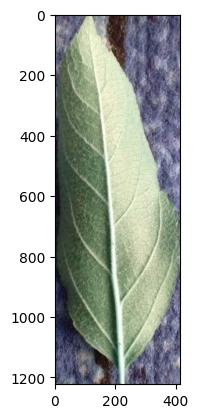

In [2]:
c=cv2.imread("/kaggle/input/d-kap/APPLE_DISEASE_DATASET/HEALTHY LEAVES/1005.JPG.jpeg")
plt.imshow(c)
c.shape

In [3]:
df="/kaggle/input/d-kap/APPLE_DISEASE_DATASET"

In [4]:
training_data=image_dataset_from_directory(
df,
seed=123,
shuffle=True,
subset="training",
batch_size=32,
image_size=(512,400),
validation_split=0.2,
)

validation_data=image_dataset_from_directory(
df,
seed=123,
shuffle=True,
subset="validation",
batch_size=32,
image_size=(512,400),
validation_split=0.2,
)

Found 419 files belonging to 4 classes.
Using 336 files for training.
Found 419 files belonging to 4 classes.
Using 83 files for validation.


# # Deep learning

In [5]:
for img,label in training_data.take(1):
    print(img.shape)

(32, 512, 400, 3)


In [6]:
from keras.models import Model
from keras.layers import Dense,Flatten,Input,Conv2D,MaxPooling2D,BatchNormalization,TimeDistributed
from keras.initializers import HeNormal
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [7]:
early_stopping=EarlyStopping(
monitor='val_loss',
patience=5,
verbose=1)

In [8]:
inputs=Input(shape=(512, 400, 3))
c=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs)
c=Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
t=TimeDistributed(Dense(32,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01)))(m)
b=BatchNormalization()(t)

c=Conv2D(64,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(b)
c=Conv2D(64,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
m=MaxPooling2D(2,2)(c)
t=TimeDistributed(Dense(32,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01)))(m)
b=BatchNormalization()(t)

# c=Conv2D(128,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(b)
# c=Conv2D(128,(3,3),activation="relu",padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(c)
# m=MaxPooling2D(2,2)(c)
# t=TimeDistributed(Dense(32,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01)))(m)
# b=BatchNormalization()(t)



f=Flatten()(b)
d=Dense(32,activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(f)
outputs=Dense(4,activation="softmax")(d)
model=Model(inputs,outputs)
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [9]:
model.fit(training_data,epochs=50,validation_data=validation_data,callbacks=[early_stopping])

Epoch 1/50


I0000 00:00:1725869842.723256     451 service.cc:145] XLA service 0x7cc7240169f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725869842.723314     451 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725869842.723320     451 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2024-09-09 08:17:40.080422: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,512,400]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,512,400]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-09-09 08:17:40.554827: E e

10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.3158 - loss: 43.6706

2024-09-09 08:19:23.285231: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[16,32,512,400]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,512,400]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-09-09 08:19:23.529625: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.244575456s
Trying algorithm eng0{} for conv (f32[16,32,512,400]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,512,400]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","w

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.3199 - loss: 43.9513   

2024-09-09 08:21:03.709217: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[19,32,512,400]{3,2,1,0}, u8[0]{0}) custom-call(f32[19,32,512,400]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-09-09 08:21:04.784659: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2.075561937s
Trying algorithm eng0{} for conv (f32[19,32,512,400]{3,2,1,0}, u8[0]{0}) custom-call(f32[19,32,512,400]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","w

11/11 ━━━━━━━━━━━━━━━━━━━━ 267s 14s/step - accuracy: 0.3232 - loss: 44.1853 - val_accuracy: 0.2169 - val_loss: 1469.4022
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 488ms/step - accuracy: 0.4621 - loss: 17.0045 - val_accuracy: 0.2169 - val_loss: 1206.3759
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 492ms/step - accuracy: 0.5778 - loss: 11.5890 - val_accuracy: 0.2169 - val_loss: 764.8972
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 501ms/step - accuracy: 0.5230 - loss: 11.2936 - val_accuracy: 0.2048 - val_loss: 492.6473
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 501ms/step - accuracy: 0.5049 - loss: 10.8038 - val_accuracy: 0.2289 - val_loss: 156.9456
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 501ms/step - accuracy: 0.4942 - loss: 10.6422 - val_accuracy: 0.2289 - val_loss: 150.3890
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 500ms/step - accuracy: 0.4837 - loss: 10.6864 - val_accuracy: 0.2892 - val_loss: 64.7052
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 492ms/step - accuracy: 0.4923 - loss: 10.1229 - val_

In [13]:
loss,accuracy=model.evaluate(validation_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.4786 - loss: 8.0119
